In [105]:
# Librairies et fonctions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [106]:
df = pd.read_csv('donnees_simulees.csv')
df.head()

,UFR,Filière,Sexe,Niveau,Fréquence d'utilisation,Durée par session (min),Impact sur la motivation,Moyenne actuelle,Moyenne avant l'accès,Moyenne après l'accès,Temps d'étude/semaine (h),Usage de la connexion,Statut de réussite
0,SEG,HA,Feminin,L3,Occasionnelle,179,Augmenté,7.131486,10.186278,16.147228,7,Réseaux sociax,1
1,ST,SVT,Feminin,L2,Quotidienne,145,Diminué,3.547731,12.618552,16.408861,11,Réseaux sociax,1
2,LSH,HA,Masculin,L2,Quotidienne,10,Augmenté,15.392803,4.821351,12.657355,8,Autres,1
3,SEG,MPCI,Masculin,L2,Occasionnelle,245,Augmenté,11.010319,5.627384,7.837539,21,Réseaux sociax,1
4,SEG,MPCI,Masculin,L2,Occasionnelle,36,Augmenté,9.919945,5.524963,4.105976,30,Autres,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   UFR                        2000 non-null   object 
 1   Filière                    2000 non-null   object 
 2   Sexe                       2000 non-null   object 
 3   Niveau                     2000 non-null   object 
 4   Fréquence d'utilisation    2000 non-null   object 
 5   Durée par session (min)    2000 non-null   int64  
 6   Impact sur la motivation   2000 non-null   object 
 7   Moyenne actuelle           2000 non-null   float64
 8   Moyenne avant l'accès      2000 non-null   float64
 9   Moyenne après l'accès      2000 non-null   float64
 10  Temps d'étude/semaine (h)  2000 non-null   int64  
 11  Usage de la connexion      2000 non-null   object 
 12  Statut de réussite         2000 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage:

In [108]:
# Calcul de la variation de la moyenne académique
df['variation_moyenne'] = df['Moyenne après l\'accès'] - df['Moyenne avant l\'accès']

# Définir l'impact global (Positif, Négatif, Neutre)
def definir_impact(row):
    if row['variation_moyenne'] > 0:
        return 1
    elif row['variation_moyenne'] < 0:
        return 0
    else:
        return 3

df['impact_global'] = df.apply(definir_impact, axis=1)
df.drop('variation_moyenne', axis=1, inplace=True)


## Encodeage des variables catégorielles

In [109]:
from sklearn.preprocessing import LabelEncoder

# Instanciation d'un encodeur
label_encoder = LabelEncoder()

# Sélection des colonnes à encoder
categorical_columns = ["UFR", "Filière", "Sexe", "Niveau", "Fréquence d'utilisation", "Impact sur la motivation", "Usage de la connexion"]

# Application de l'encodage sur chaque colonne catégorielle
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


## Histogrammes pour la distribution des notes avant, pendant et après

In [110]:
# Statistiques descriptives
print(df.describe())


               UFR      Filière         Sexe      Niveau  \
count  2000.000000  2000.000000  2000.000000  2000.00000   
mean      0.989000     2.984000     0.499000     1.00400   
std       0.817443     2.003934     0.500124     0.82724   
min       0.000000     0.000000     0.000000     0.00000   
25%       0.000000     1.000000     0.000000     0.00000   
50%       1.000000     3.000000     0.000000     1.00000   
75%       2.000000     5.000000     1.000000     2.00000   
max       2.000000     6.000000     1.000000     2.00000   

       Fréquence d'utilisation  Durée par session (min)  \
count              2000.000000              2000.000000   
mean                  0.976000               151.658500   
std                   0.816552                85.099941   
min                   0.000000                 5.000000   
25%                   0.000000                80.750000   
50%                   1.000000               150.000000   
75%                   2.000000               2

Text(0.5, 1.0, 'Distribution des notes après')

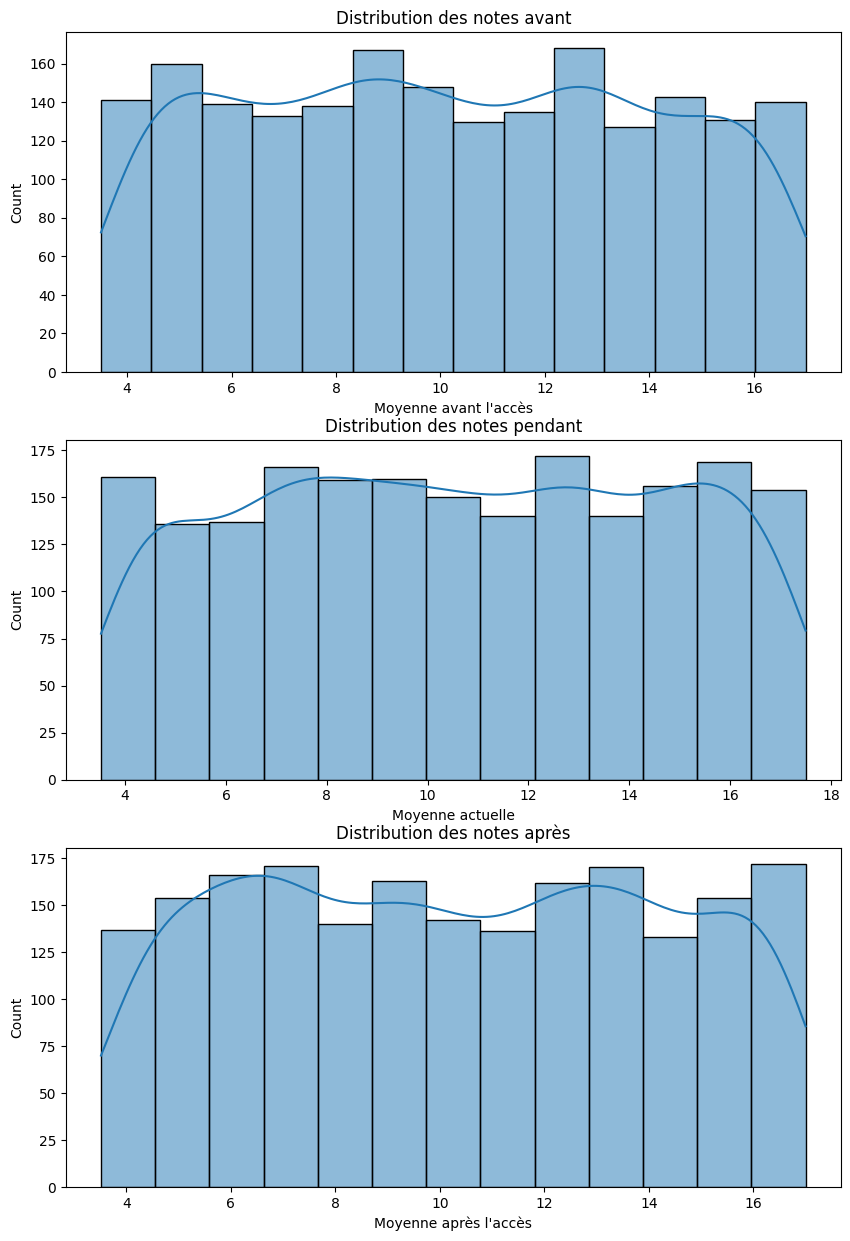

In [111]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.histplot(df["Moyenne avant l'accès"], kde=True, ax=axes[0]).set_title('Distribution des notes avant')
sns.histplot(df['Moyenne actuelle'], kde=True, ax=axes[1]).set_title('Distribution des notes pendant')
sns.histplot(df["Moyenne après l'accès"], kde=True, ax=axes[2]).set_title('Distribution des notes après')

## Boxplots pour identifier les valeurs aberrantes

<Figure size 640x480 with 0 Axes>

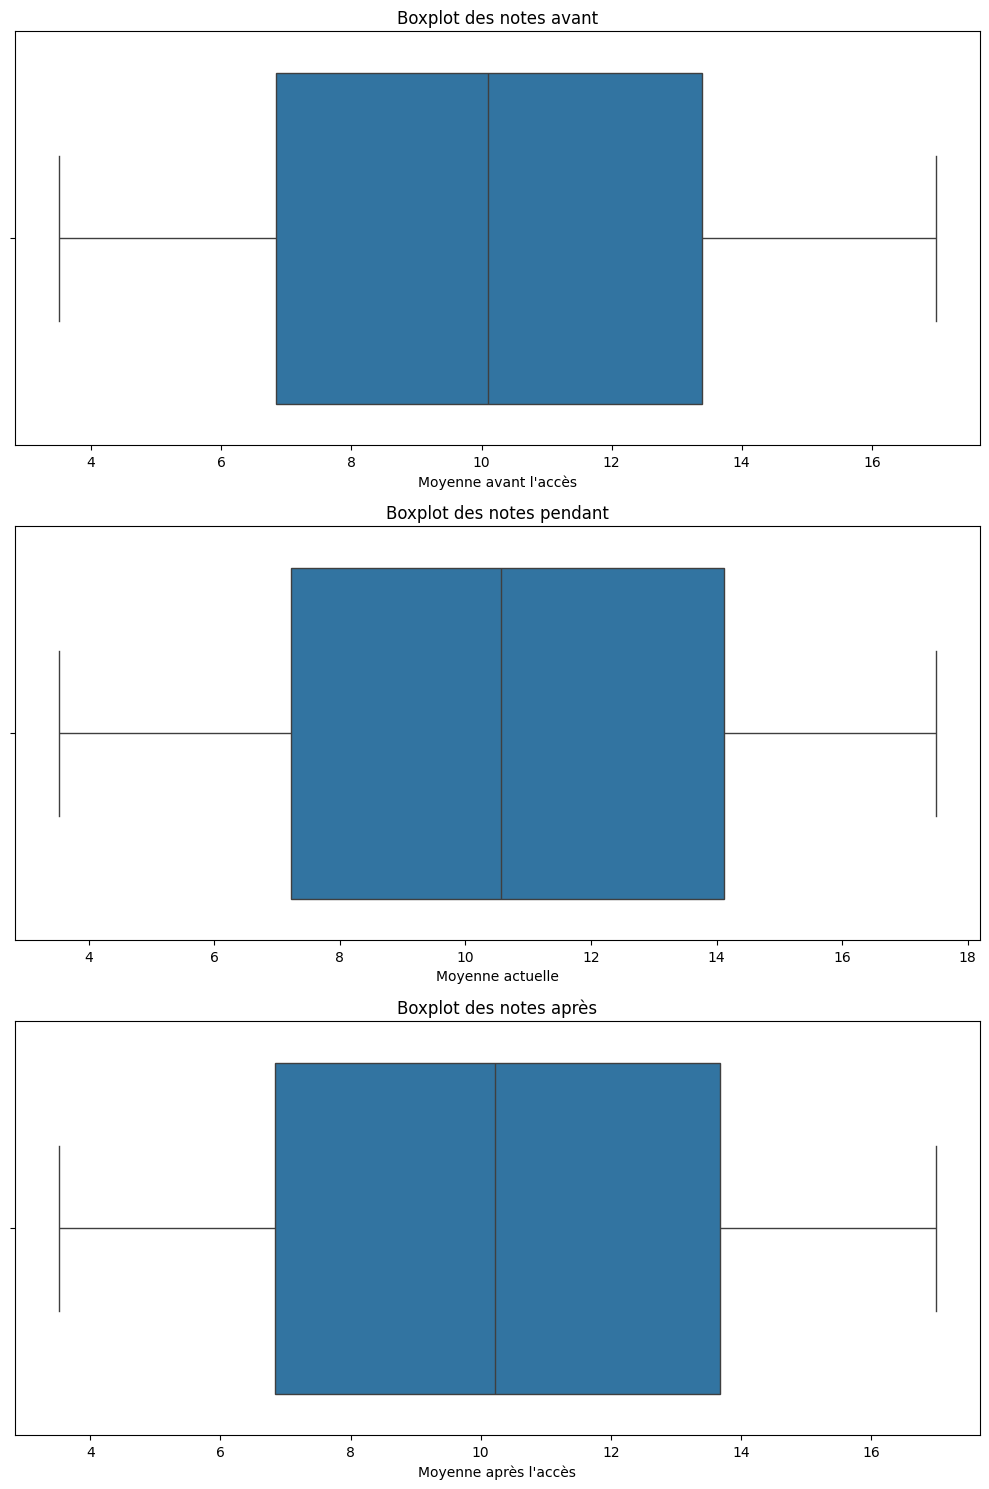

In [112]:
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.boxplot(x=df["Moyenne avant l'accès"], ax=axes[0]).set_title('Boxplot des notes avant')
sns.boxplot(x=df['Moyenne actuelle'], ax=axes[1]).set_title('Boxplot des notes pendant')
sns.boxplot(x=df["Moyenne après l'accès"], ax=axes[2]).set_title('Boxplot des notes après')

plt.tight_layout()
plt.show()

## Matrice de corrélation pour comprendre les relations entre variables

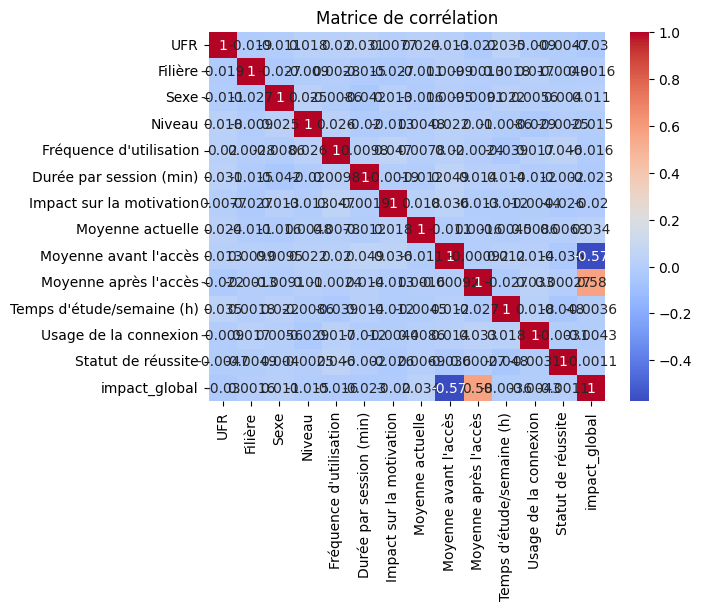

In [113]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

## Trainset

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [116]:
trainset['impact_global'].value_counts()

impact_global
1    801
0    799
Name: count, dtype: int64

In [117]:
testset['impact_global'].value_counts()

impact_global
1    210
0    190
Name: count, dtype: int64

In [118]:
def preprocessing(df):
    
    X = df.drop('impact_global', axis=1)
    y = df['impact_global']
    
    print(y.value_counts())
    
    return X, y

In [119]:
X_train, y_train = preprocessing(trainset)

impact_global
1    801
0    799
Name: count, dtype: int64


In [120]:
X_test, y_test = preprocessing(testset)


impact_global
1    210
0    190
Name: count, dtype: int64


## Modélisation

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import learning_curve


In [122]:
model_1 = RandomForestClassifier(random_state=0)
model_2 = AdaBoostClassifier(random_state=0)

## Procédure d'évalution

In [123]:
# Réorganiser les colonnes de X_test
X_test = X_test[X_train.columns]


In [124]:
def evaluation(model):
    # Entraînement du modèle
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    # Affichage des scores
    print("Matrice de confusion :\n", confusion_matrix(y_test, ypred))
    print("\nRapport de classification :\n", classification_report(y_test, ypred))

    # Calcul des learning curves
    N, train_score, val_score = learning_curve(
        model, X_train, y_train,
        cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10)
    )

    # Affichage de la courbe d'évaluation
    plt.figure(figsize=(12, 6))
    plt.plot(N, train_score.mean(axis=1), label='Score d\'entraînement', marker='o')
    plt.plot(N, val_score.mean(axis=1), label='Score de validation', marker='o')
    plt.title('Courbe d\'évaluation du modèle')
    plt.xlabel('Nombre d\'échantillons utilisés pour l\'entraînement')
    plt.ylabel('Score F1')
    plt.legend()
    plt.grid()
    plt.show()

    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test, ypred)

    # Affichage de la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matrice de Confusion')
    plt.xlabel('Prédictions')
    plt.ylabel('Vérités Terrain')
    plt.show()


Matrice de confusion :
 [[186   4]
 [  7 203]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       190
           1       0.98      0.97      0.97       210

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



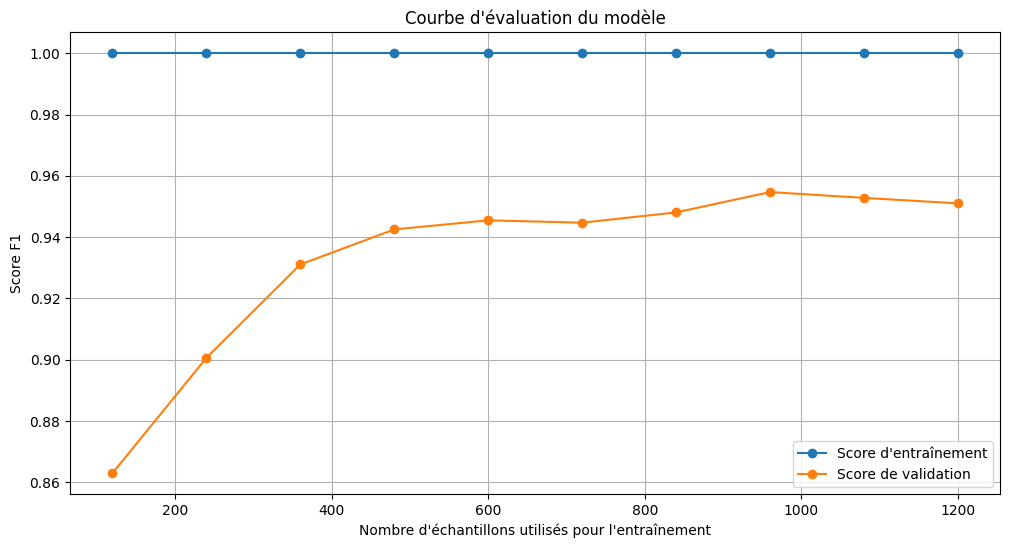

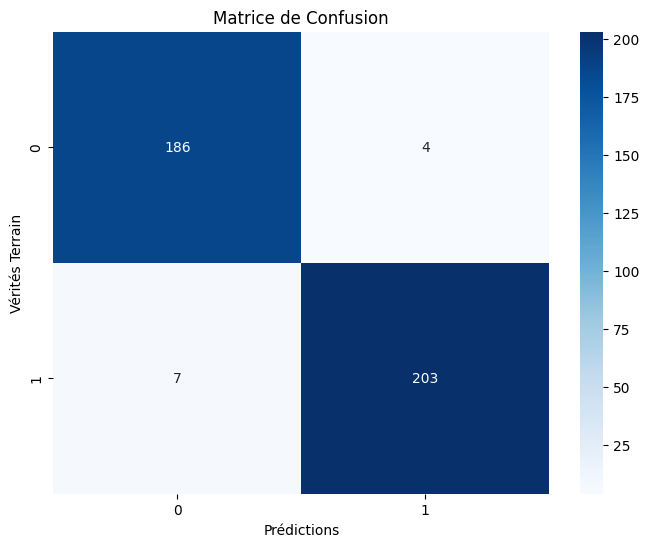

c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Matrice de confusion :
 [[189   1]
 [  5 205]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       190
           1       1.00      0.98      0.99       210

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400



c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R alg

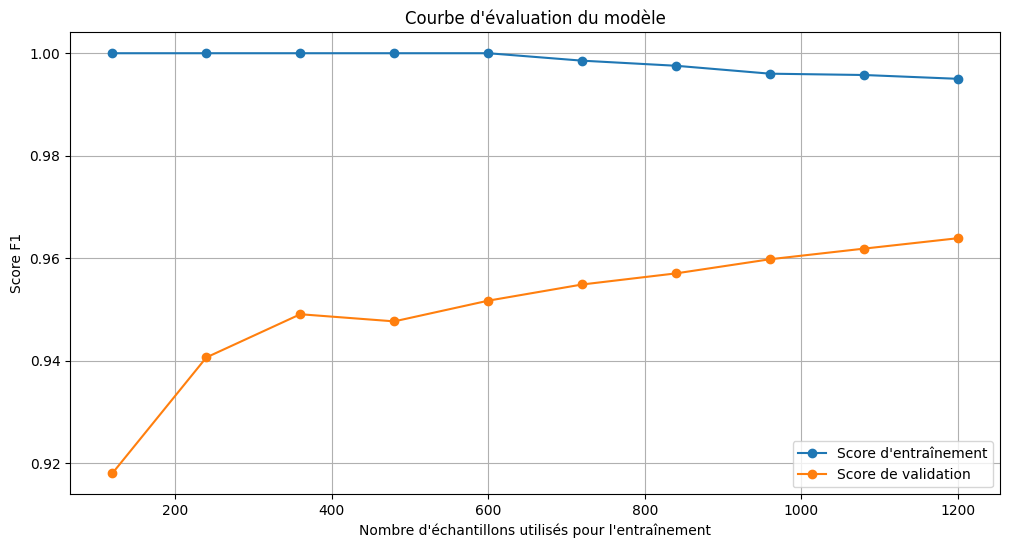

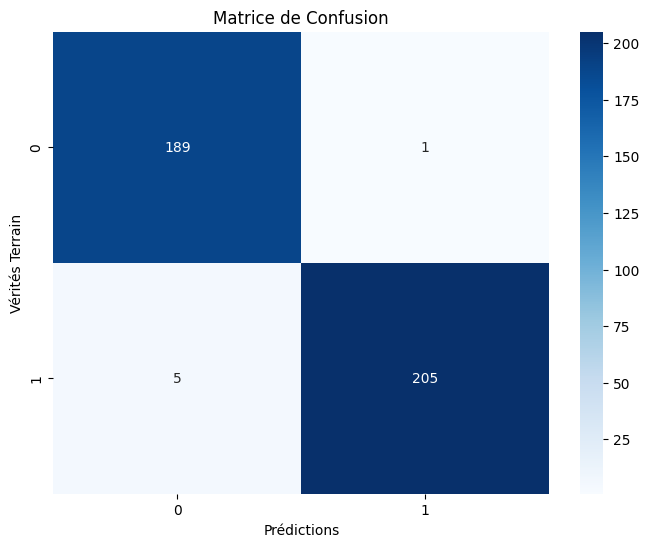

In [125]:
evaluation(model_1)
evaluation(model_2)

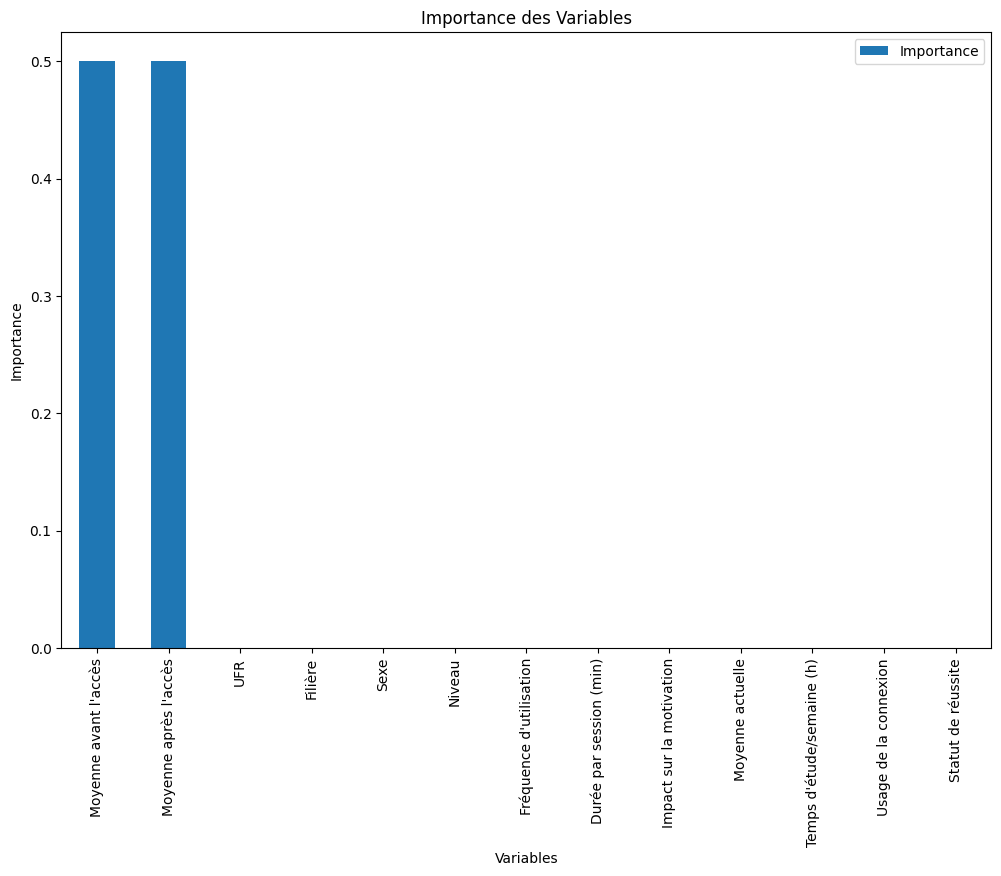

In [126]:
# Créer un DataFrame avec les importances des fonctionnalités
feature_importances_df = pd.DataFrame(model_2.feature_importances_, index=X_train.columns, columns=['Importance'])

# Trier les importances par ordre décroissant
feature_importances_df_sorted = feature_importances_df.sort_values(by='Importance', ascending=False)

# Tracer le graphique en barres
feature_importances_df_sorted.plot.bar(figsize=(12, 8))
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance des Variables')
plt.show()

In [127]:
feature_importances_df_sorted

,Importance
Moyenne avant l'accès,0.5
Moyenne après l'accès,0.5
UFR,0.0
Filière,0.0
Sexe,0.0
Niveau,0.0
Fréquence d'utilisation,0.0
Durée par session (min),0.0
Impact sur la motivation,0.0
Moyenne actuelle,0.0


## Entrainement des modèls

In [129]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [130]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
DecisionTree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))
LinearReg = LinearRegression()
NeuralNetwork = make_pipeline(preprocessor, StandardScaler(), MLPClassifier(random_state=0, max_iter=100))
LogisticReg = LogisticRegression()

In [131]:
dict_of_models = {
    'RandomForest': RandomForest,
    'AdaBoost': AdaBoost,
    'SVM': SVM,
    'KNN': KNN,
}

RandomForest
Matrice de confusion :
 [[189   1]
 [  4 206]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       190
           1       1.00      0.98      0.99       210

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



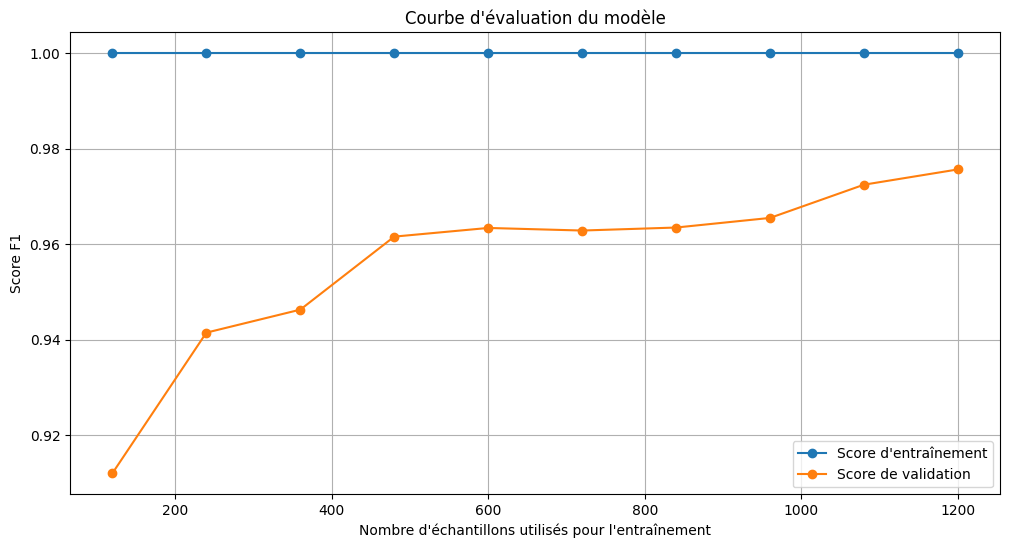

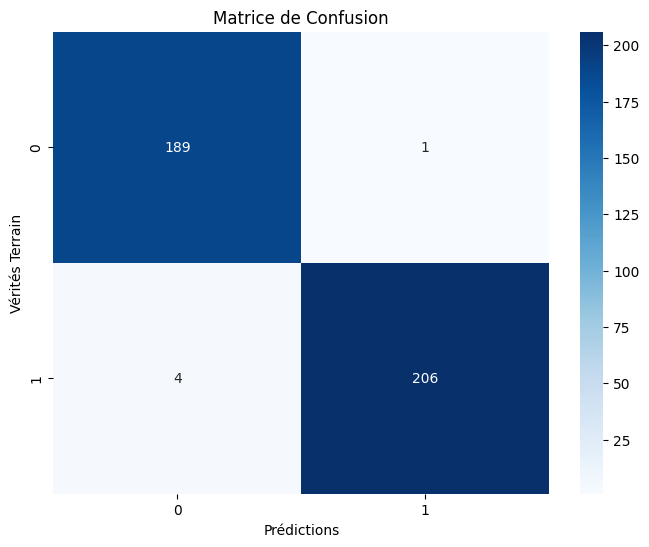

AdaBoost


c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Matrice de confusion :
 [[188   2]
 [  4 206]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       190
           1       0.99      0.98      0.99       210

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400



c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R alg

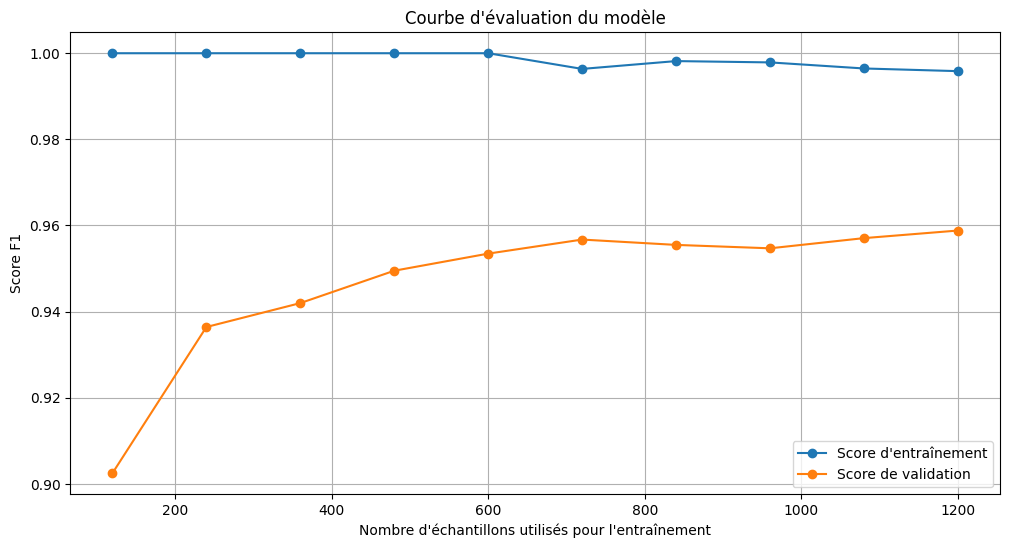

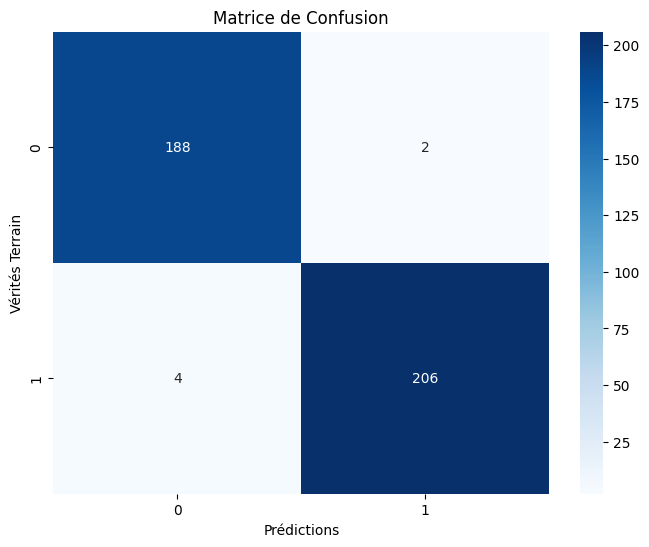

SVM
Matrice de confusion :
 [[188   2]
 [  4 206]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       190
           1       0.99      0.98      0.99       210

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400



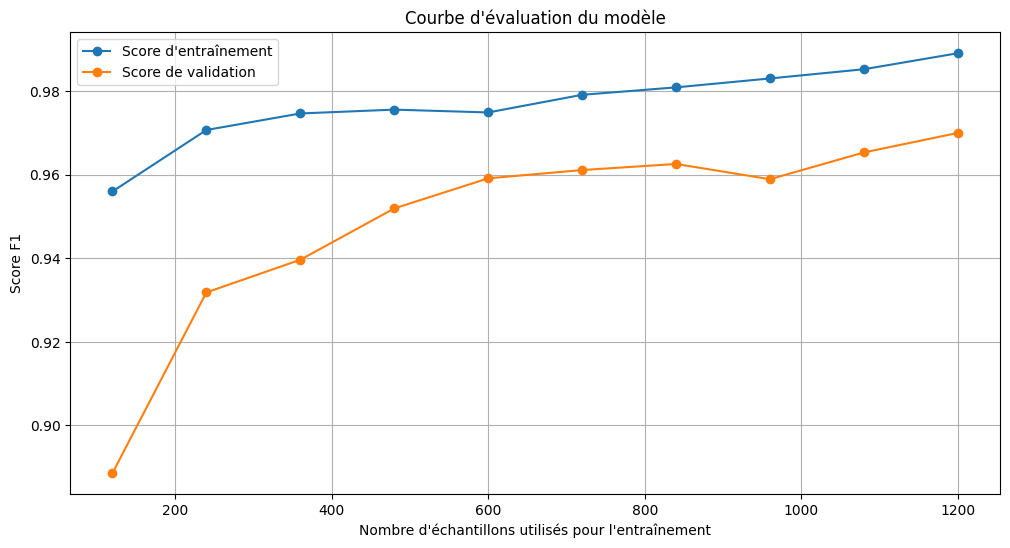

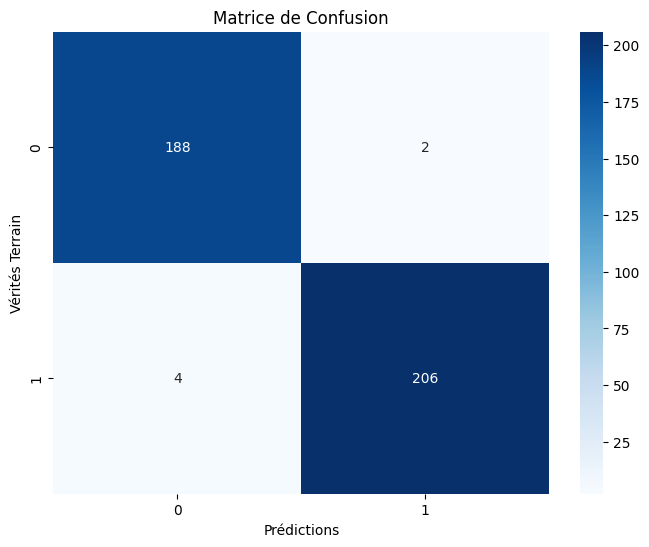

KNN
Matrice de confusion :
 [[182   8]
 [ 11 199]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       190
           1       0.96      0.95      0.95       210

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



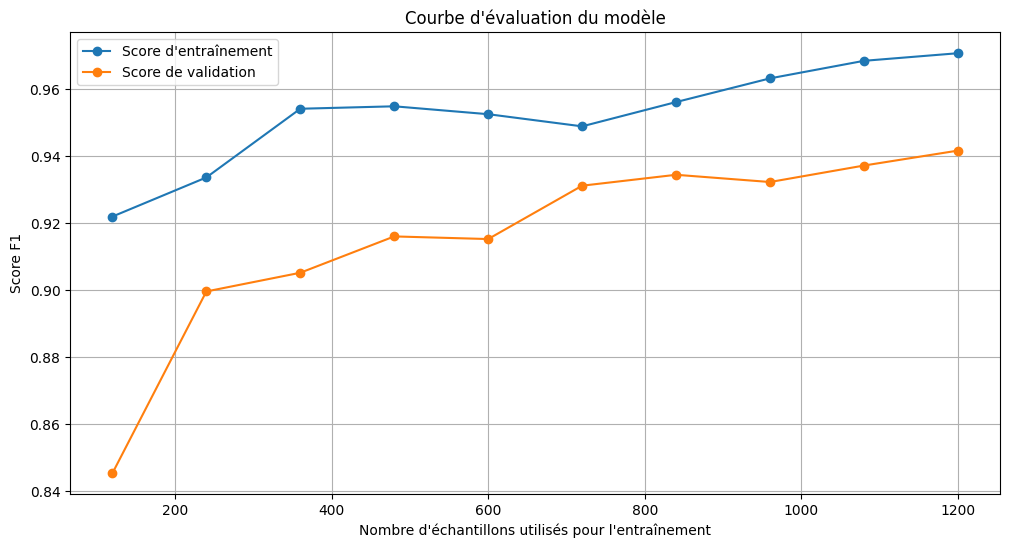

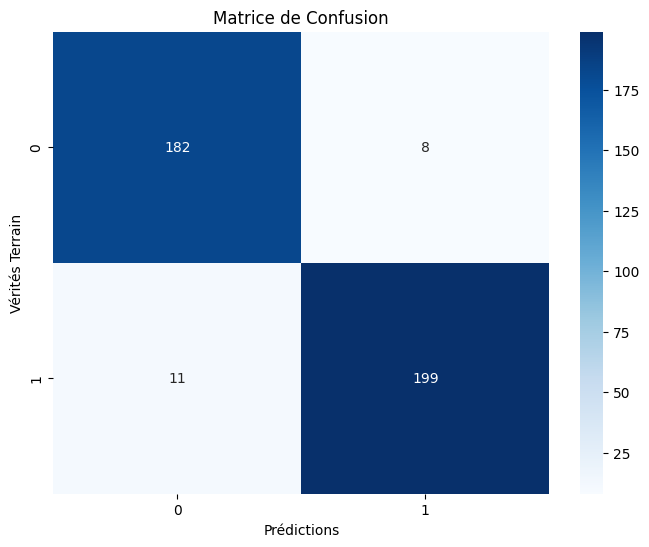

In [132]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [133]:
dict_of_models = {
    'DecisionTree': DecisionTree,
    'NeuralNetwork': NeuralNetwork,
}

DecisionTree
Matrice de confusion :
 [[184   6]
 [  5 205]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       190
           1       0.97      0.98      0.97       210

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



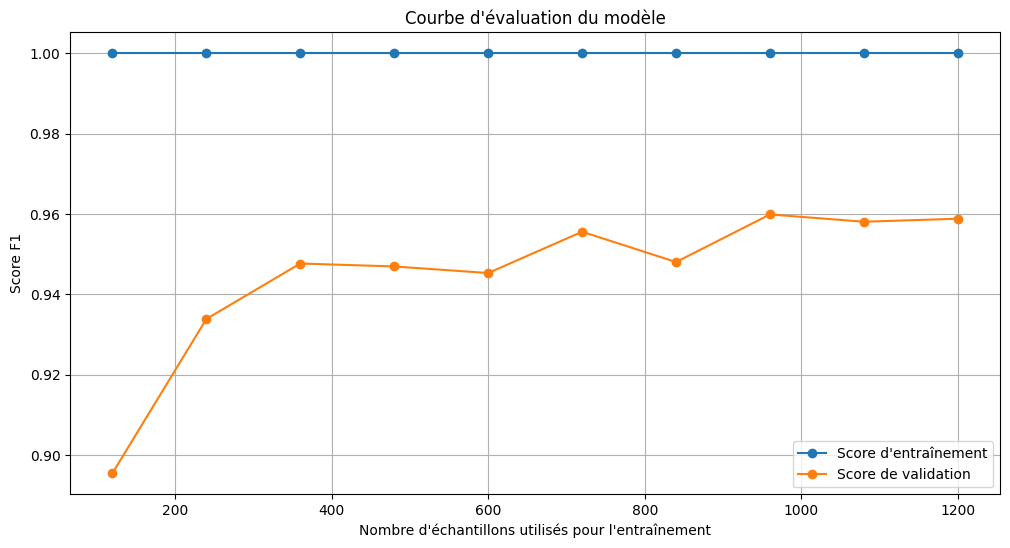

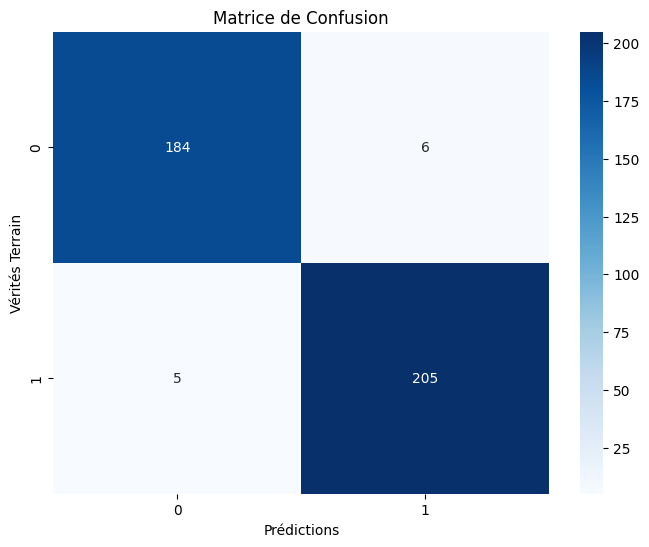

NeuralNetwork


c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Matrice de confusion :
 [[189   1]
 [  1 209]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       190
           1       1.00      1.00      1.00       210

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

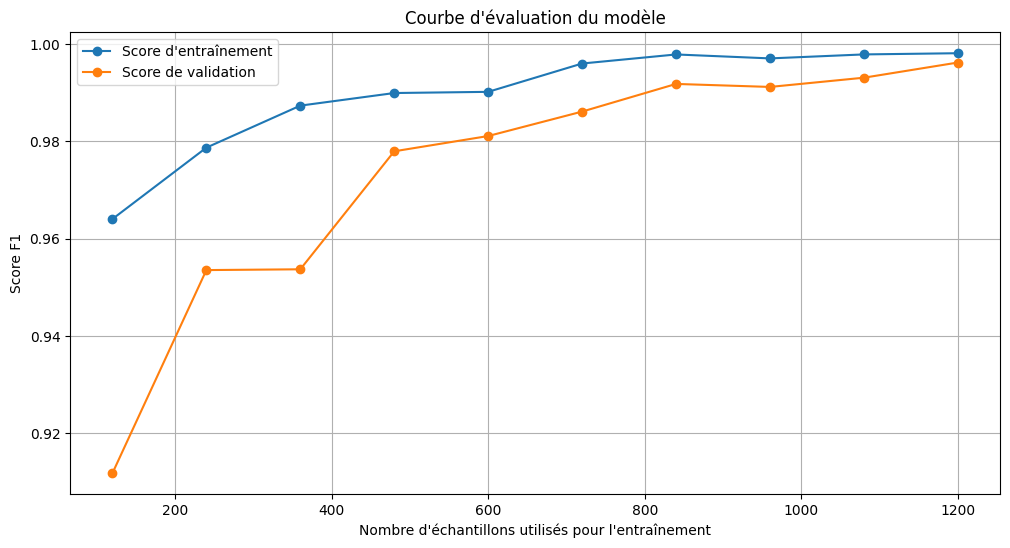

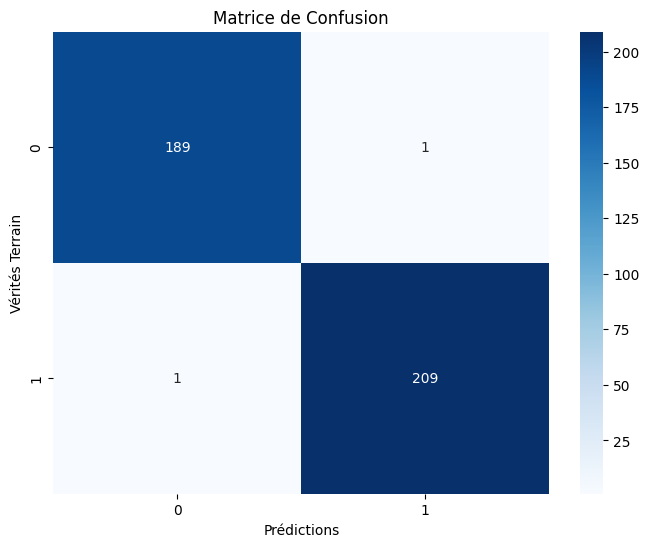

In [134]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## Model final

In [135]:
mode_final = NeuralNetwork

In [139]:
notes_etudiant = [1,	2,	0,	1,	2,	145,	1,	3.547731,	12.618552,	16.408861,	11,	1,	1]

# Utiliser le meilleur modèle pour faire des prédictions sur les données de l'étudiant
prediction_etudiant = mode_final.predict([notes_etudiant])

# Afficher la prédiction
print(prediction_etudiant)

[1]


c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


impact_global
1    1011
0     989
Name: count, dtype: int64


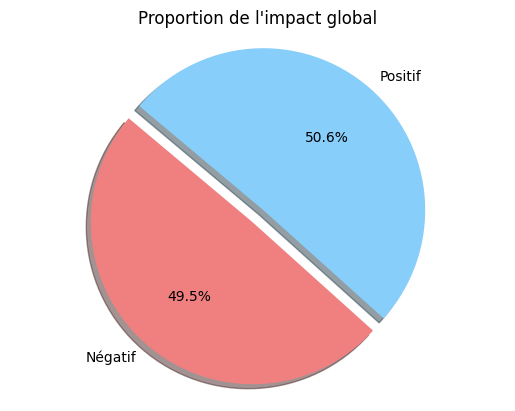

In [128]:
# Analyse de l'impact global
impact_count = df['impact_global'].value_counts()
print(impact_count)

# Visualisation de l'impact global
labels = ['Négatif', 'Positif']
sizes = [impact_count[0], impact_count[1]]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explosion du premier segment (Négatif)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Proportion de l\'impact global')
plt.axis('equal')  # Égalité de proportions
plt.show()
